In [21]:
import torch
from torch import nn
from d2l import torch as d2l

In [22]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

初始化模型参数

In [23]:
# PyTorch不会隐式地调整输入的形状
# 因此，我们在线性层前定义了展平层(flatten)来调整网络输入的形状
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01) # 正态分布，默认平均值0，设置标准差0.01

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [24]:
loss = nn.CrossEntropyLoss(reduction='none')  # 损失函数

In [25]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1) # 优化算法，小批量随机梯度下降

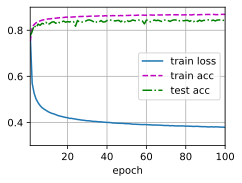

In [26]:
num_epochs = 100
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)